In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [2]:
SMH = yf.download('SMH', period='max', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


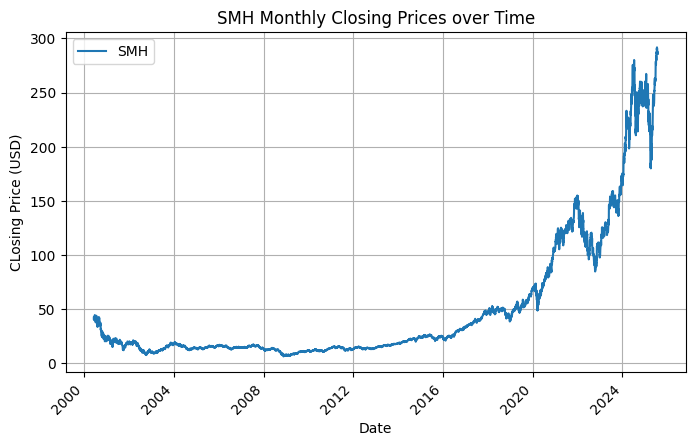

In [3]:
SMH['Close'].plot(title='SMH Monthly Closing Prices over Time', figsize=(8, 5))
plt.xlabel('Date')
plt.ylabel('CLosing Price (USD)')
plt.legend(['SMH'], loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

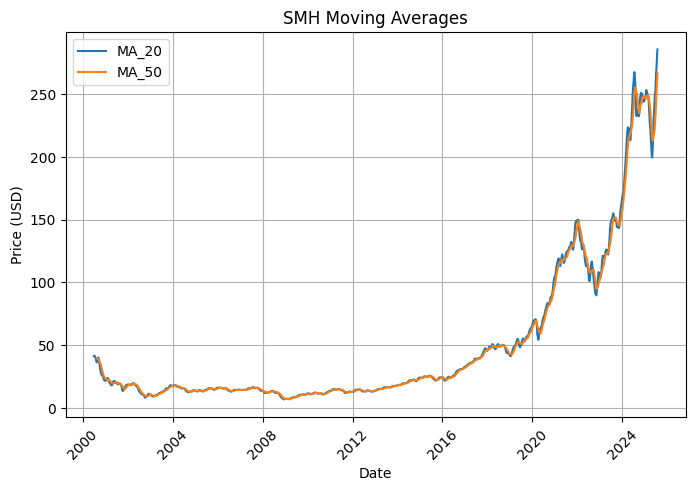

In [4]:
SMH['MA_20'] = SMH['Close'].rolling(window=20).mean()
SMH['MA_50'] = SMH['Close'].rolling(window=50).mean()

plt.figure(figsize=(8, 5))
plt.plot(SMH['MA_20'], label='MA_20')
plt.plot(SMH['MA_50'], label='MA_50')
plt.title('SMH Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [5]:
SMH.dropna(inplace=True)

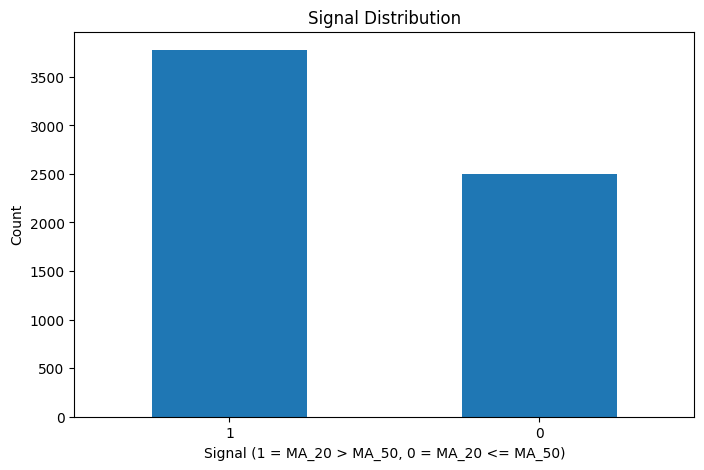

In [6]:
SMH['Signal'] = (SMH['MA_20'] > SMH['MA_50']).astype(int)

SMH['Signal'].value_counts().plot(kind='bar', title='Signal Distribution', figsize=(8, 5))
plt.xlabel('Signal (1 = MA_20 > MA_50, 0 = MA_20 <= MA_50)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
SMH['log_return'] = np.log(SMH['Close'] / SMH['Close'].shift(1))

In [8]:
SMH['Strategy_Return'] = SMH['Signal'].shift(1) * SMH['log_return']

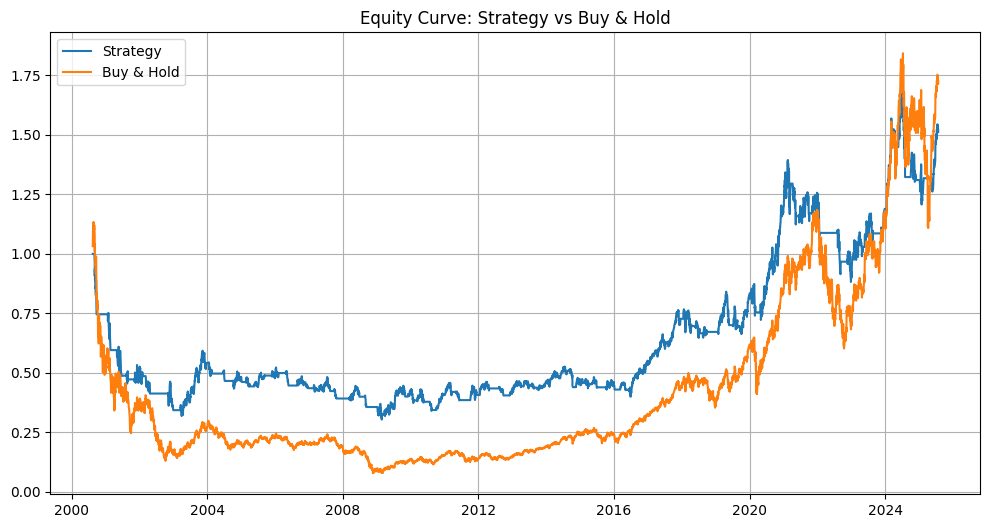

In [9]:
SMH['Equity_Curve'] = (1 + SMH['Strategy_Return']).cumprod()
SMH['Buy_Hold'] = (1 + SMH['log_return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(SMH['Equity_Curve'], label='Strategy')
plt.plot(SMH['Buy_Hold'], label='Buy & Hold')
plt.title('Equity Curve: Strategy vs Buy & Hold')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
def evaluation_metrics(returns, freq=252):
    sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(freq)  
    cagr = (1 + returns).cumprod().iloc[-1] ** (freq / len(returns)) - 1  
    drawdown = (1 + returns).cumprod() / (1 + returns).cumprod().cummax() - 1
    max_drawdown = drawdown.min()  
    return sharpe_ratio, cagr, max_drawdown


In [11]:
strategy_metrics = evaluation_metrics(SMH['Strategy_Return'].dropna())
buy_hold_metrics = evaluation_metrics(SMH['log_return'].dropna())

print(f"Strategy: \nSharpe: {strategy_metrics[0]:.2f}, CAGR: {strategy_metrics[1]:.2%}, Max Drawdown: {strategy_metrics[2]:.2%}") 
print("\n")
print(f"Buy & Hold:\nSharpe: {buy_hold_metrics[0]:.2f}, CAGR: {buy_hold_metrics[1]:.2%}, Max Drawdown: {buy_hold_metrics[2]:.2%}")


Strategy: 
Sharpe: 0.19, CAGR: 1.67%, Max Drawdown: -69.61%


Buy & Hold:
Sharpe: 0.24, CAGR: 2.19%, Max Drawdown: -93.10%
